This is mainly EDA a work.Try to find out different information and visualize them.

The work will done by asking different question.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1zmoWfePlUhMRjHxMq0lKEoocVPxK1vb3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('65 Years of Weather Data Bangladesh (1948 - 2013).csv') 

In [0]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [8]:
df.head(10)

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01
5,Barisal,1954,1,27.8,12.7,0.0,72.0,0.453704,0.5,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1954.01
6,Barisal,1955,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1955.01
7,Barisal,1956,1,29.4,14.3,17.0,74.0,0.453704,0.4,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1956.01
8,Barisal,1957,1,30.1,15.1,104.0,80.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1957.01
9,Barisal,1958,1,31.1,15.5,0.0,77.0,0.453704,1.7,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1958.01


In [0]:
df.isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

## EDA 

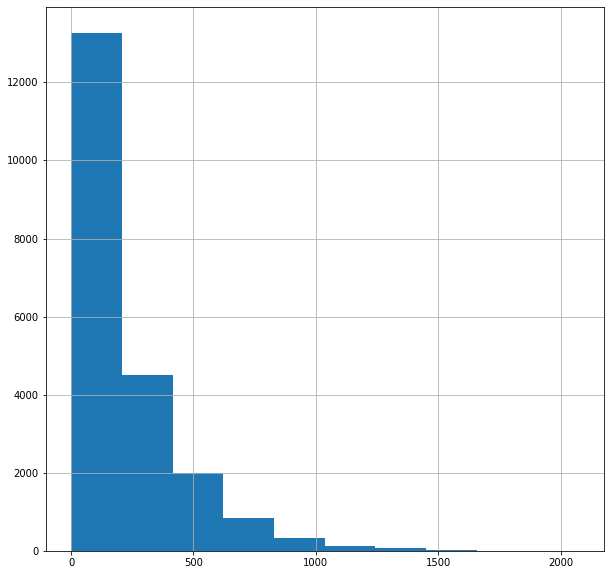

In [0]:
plt.figure(figsize = (10 , 10))
df.Rainfall.hist()

### Which year have highest Rainfall.

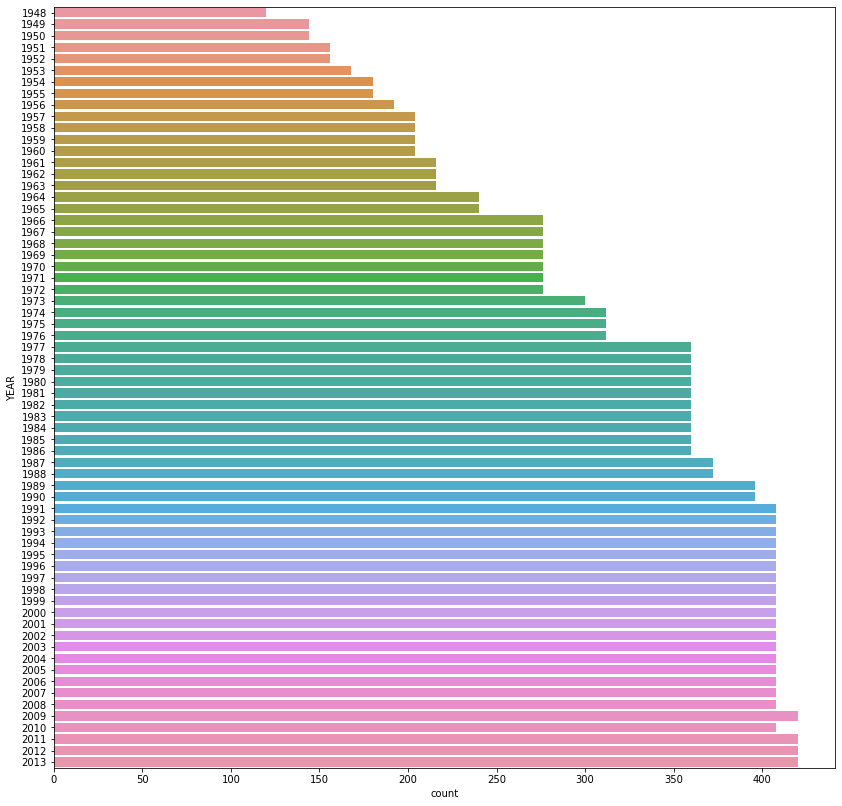

In [0]:
plt.figure(figsize = (14 , 14))
sns.countplot(y = 'YEAR' , data = df)

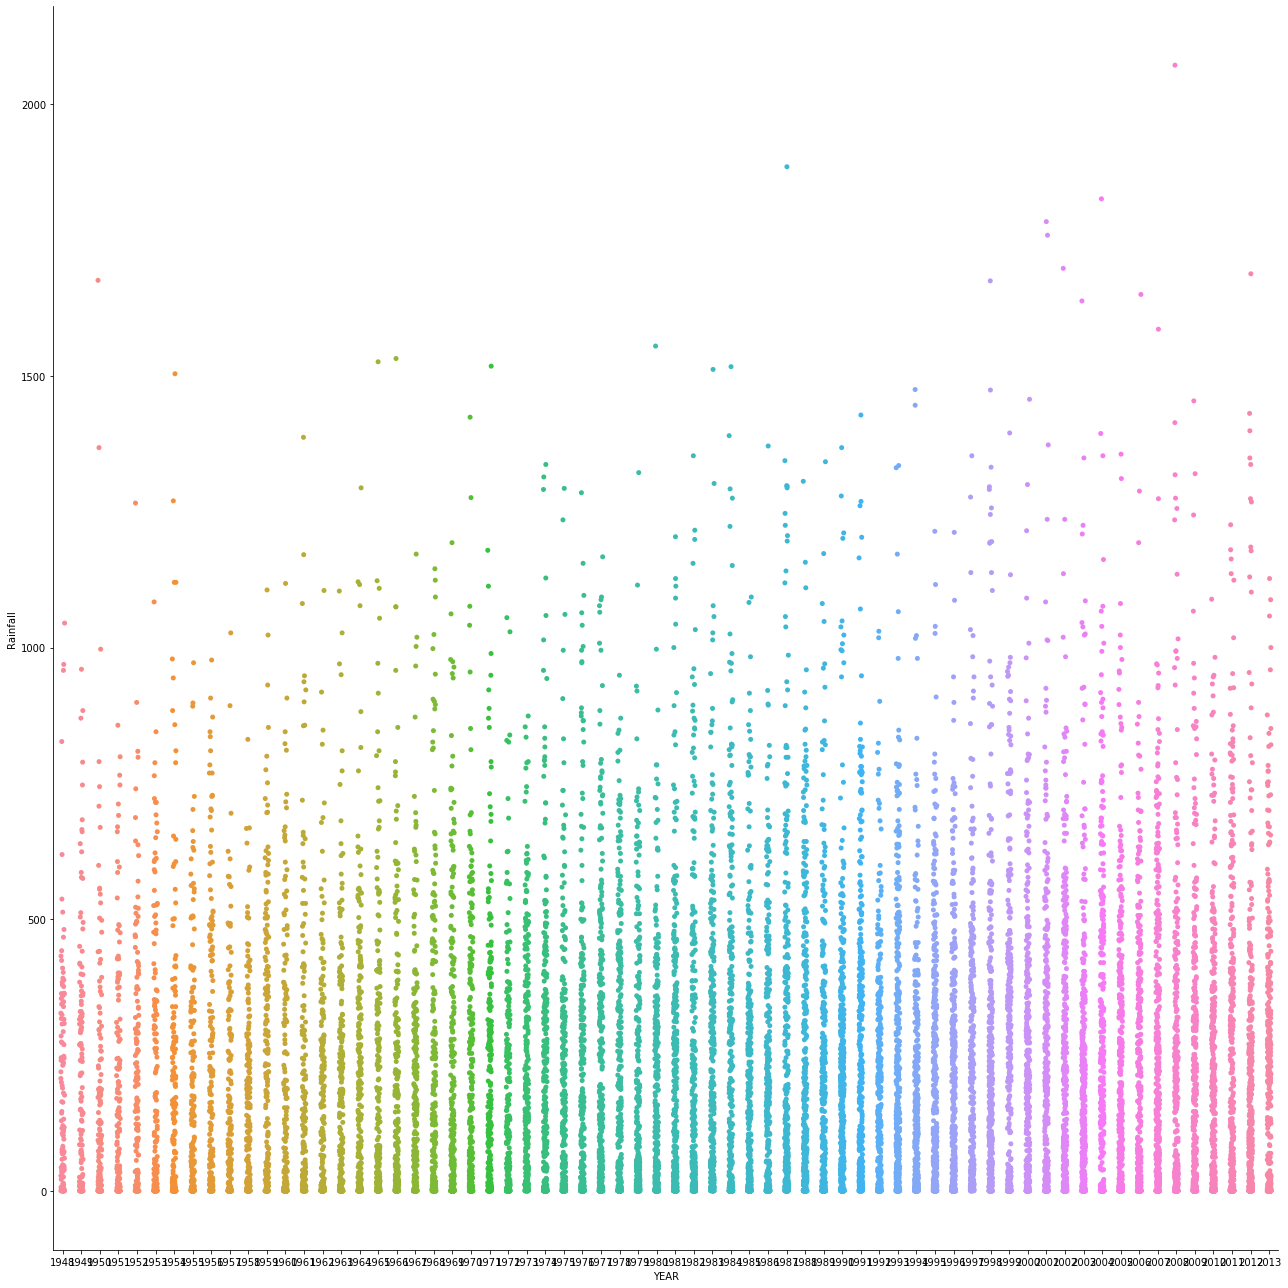

In [0]:
sns.catplot(x = "YEAR" , y = "Rainfall" , data = df  , height = 18)

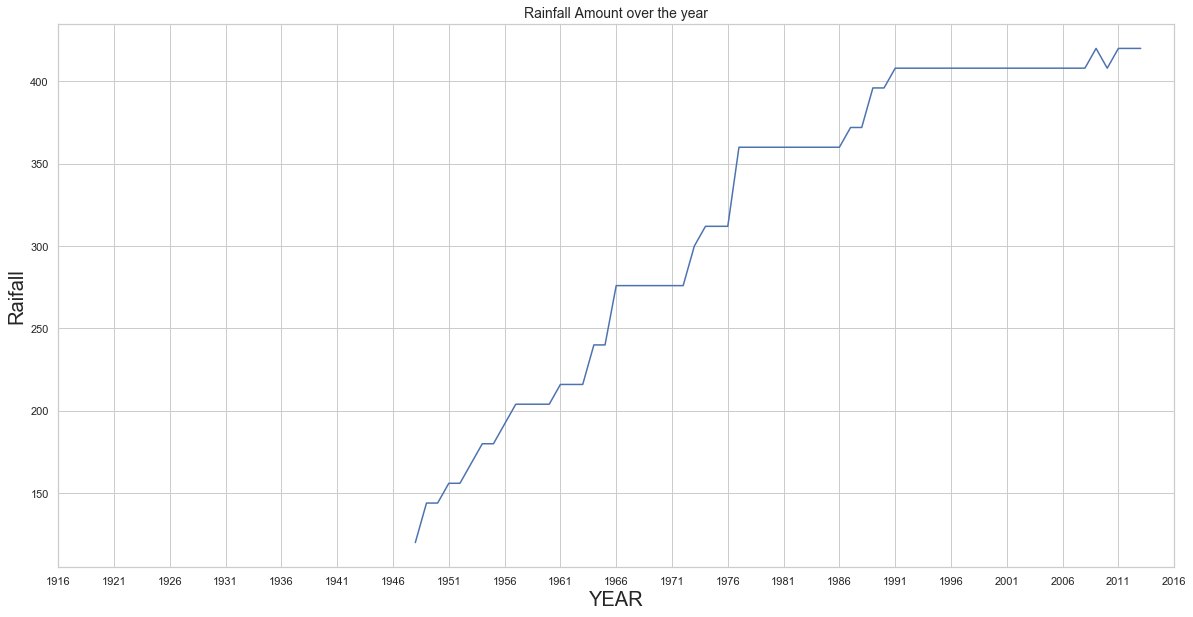

In [0]:
df.groupby('YEAR').count()['Station Number'].plot(xticks  = np.arange(1916 , 2017 , 5))

# Plot on grpah
sns.set(rc = {'figure.figsize':(20 , 10)})
plt.title("Rainfall Amount over the year",fontsize = 14)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('Raifall',fontsize = 20)
sns.set_style("whitegrid")

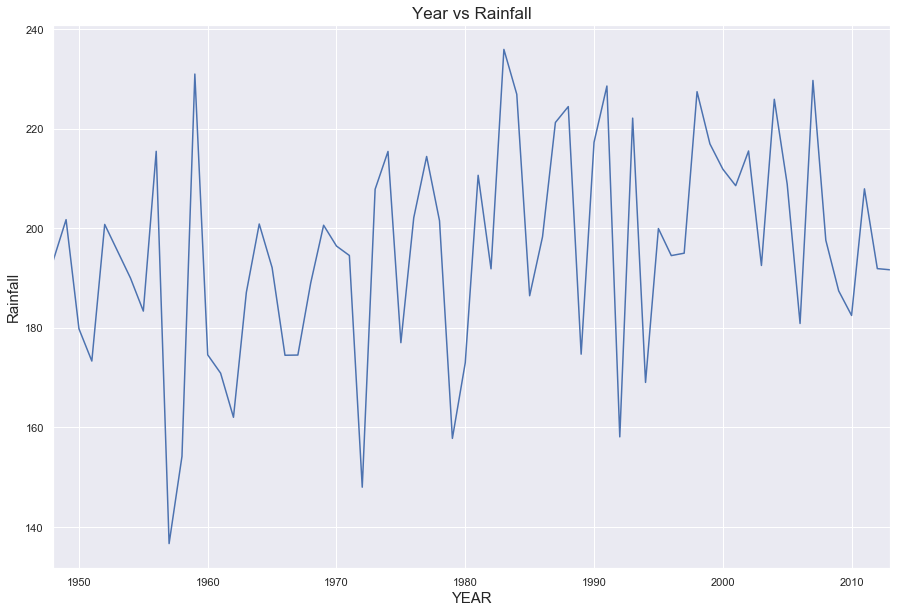

In [0]:
df.groupby('YEAR')['Rainfall'].mean().plot()

plt.title('Year vs Rainfall' , fontsize = 17)
plt.xlabel('YEAR' , fontsize = 15)
plt.ylabel('Rainfall' , fontsize = 15)

sns.set(rc={'figure.figsize':(20 , 12)})
#sns.set_style("whitegrid")

It is clear that after 2010 the rainfall decresing drastically.Higest rainfall occur between 1950 to 1960.After 1980-1990 there was good amount of rainfall occured.

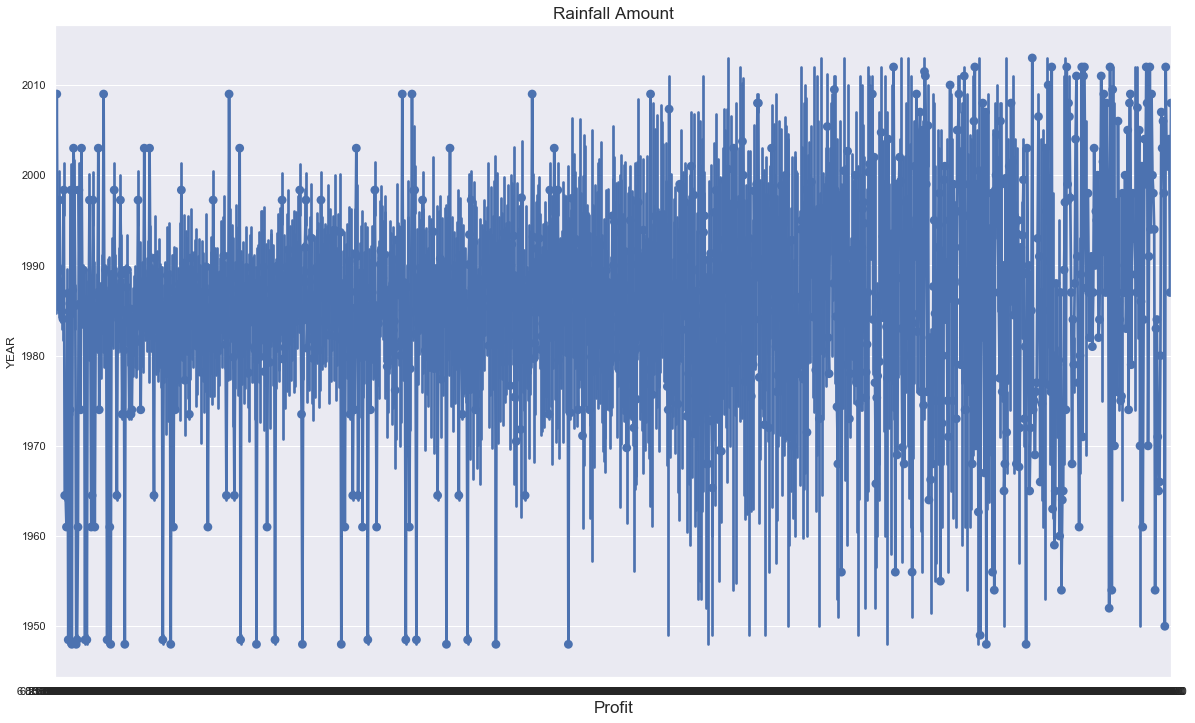

In [0]:
ax = sns.pointplot(x = df['Rainfall'] , y = df['YEAR'])

sns.set(rc = {'figure.figsize':(10 , 10)})

ax.set_title("Rainfall Amount",fontsize = 17)
ax.set_xlabel("Profit",fontsize = 17)
sns.set_style("darkgrid")

### Area which have highest Rainfall

In [0]:
df['Station Names'].value_counts()

Cox's Bazar                  792
Satkhira                     792
Srimangal                    792
Jessore                      792
Comilla                      792
Faridpur                     792
Bogra                        792
Khulna                       792
Mymensingh                   792
Dinajpur                     792
Chittagong (IAP-Patenga)     780
Barisal                      780
Maijdee Court                756
Dhaka                        732
Rangpur                      720
Sylhet                       696
Rangamati                    684
Ishurdi                      636
Rajshahi                     600
Chandpur                     600
Sandwip                      576
Hatiya                       576
Bhola                        576
Feni                         492
Patuakhali                   492
Khepupara                    480
Teknaf                       444
Kutubdia                     444
Madaripur                    444
Sitakunda                    444
Tangail   

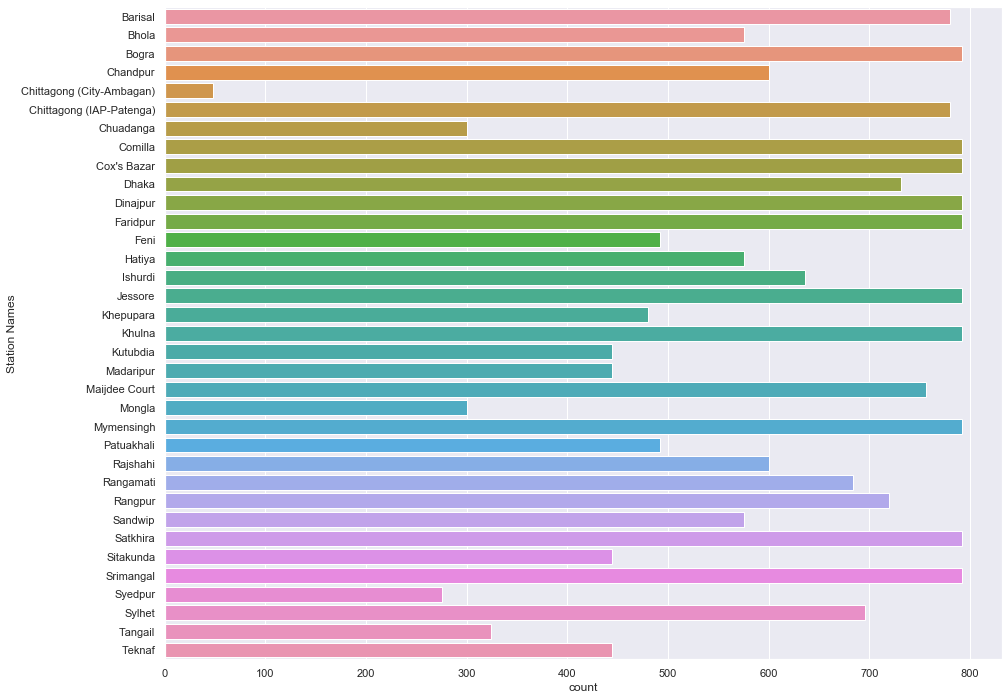

In [0]:
plt.figure(figsize = (15 , 12))
sns.countplot(y = 'Station Names' , data = df)

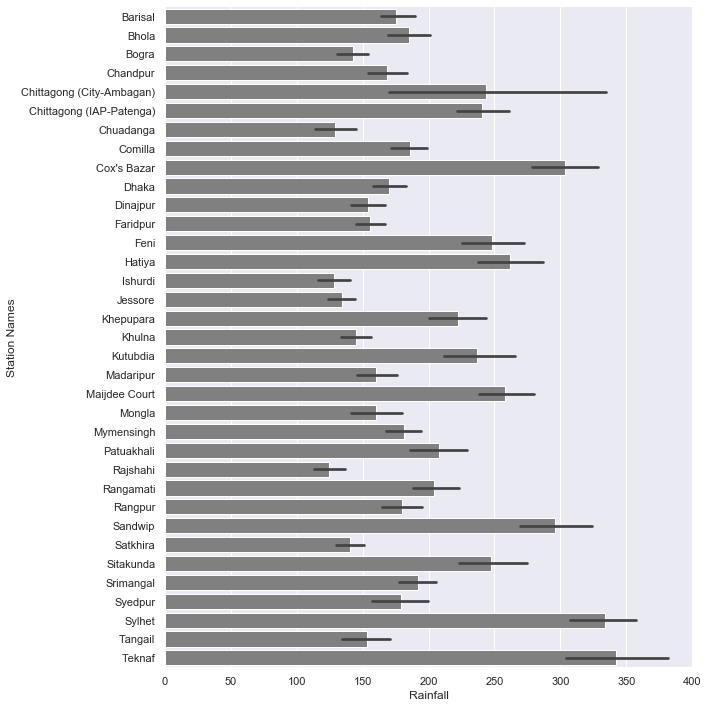

In [0]:
g = sns.catplot(x = "Rainfall" , y = "Station Names" , data = df , kind = 'bar' , height = 10 , color = 'gray')
g.despine(left=True)

From the above graph it is clear thet Tecnaf , Sandwip , Cox-bazar , Sylhet has the highest amount of rainfall.Besides that Chuadanga , Isurdi , Rajshahi has lowest amount of rainfall.

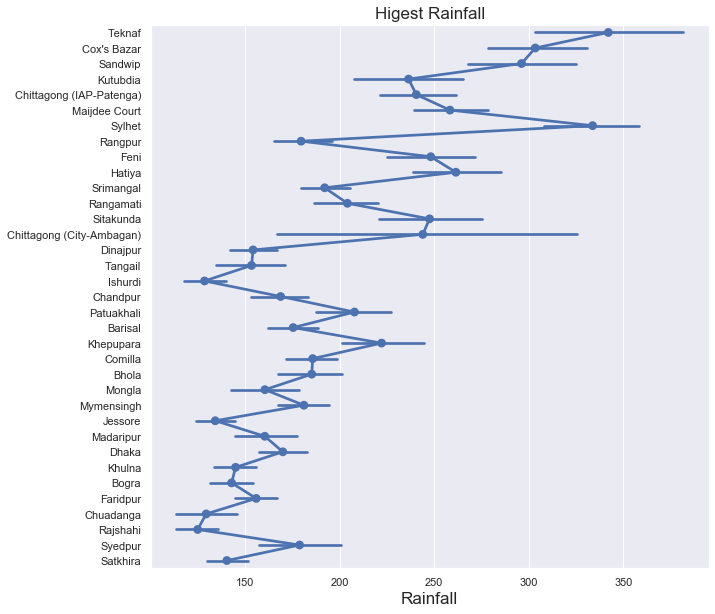

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = False))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:])
y = list(info['Rainfall'][:])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

We analysis further for better and accurate result which District have higest amount of rainfall.

### Top 5 District which have Higest Rainfall

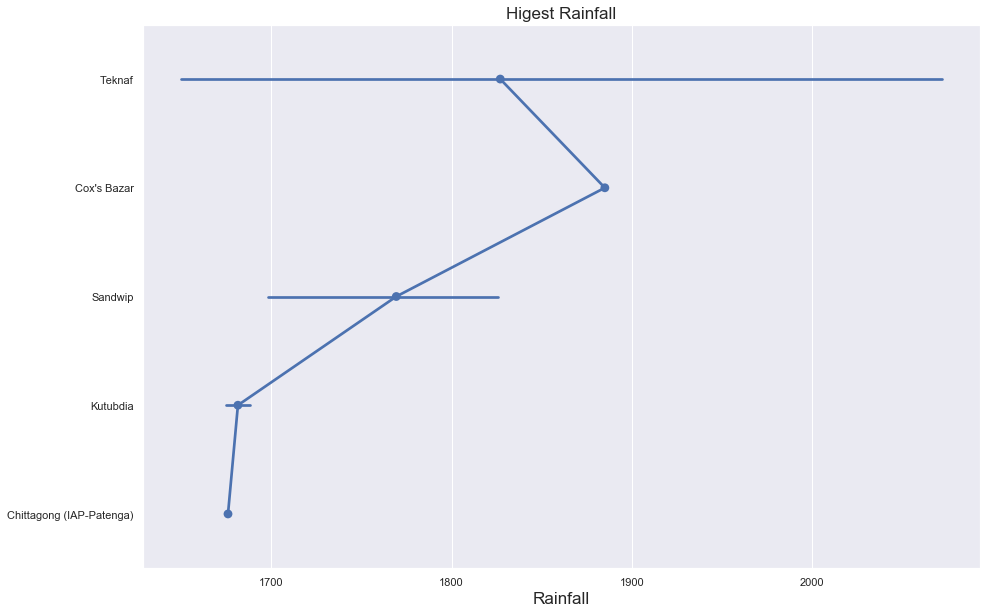

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = False))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:10])
y = list(info['Rainfall'][:10])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

### Top 5 District Which have Lowest Rainfall

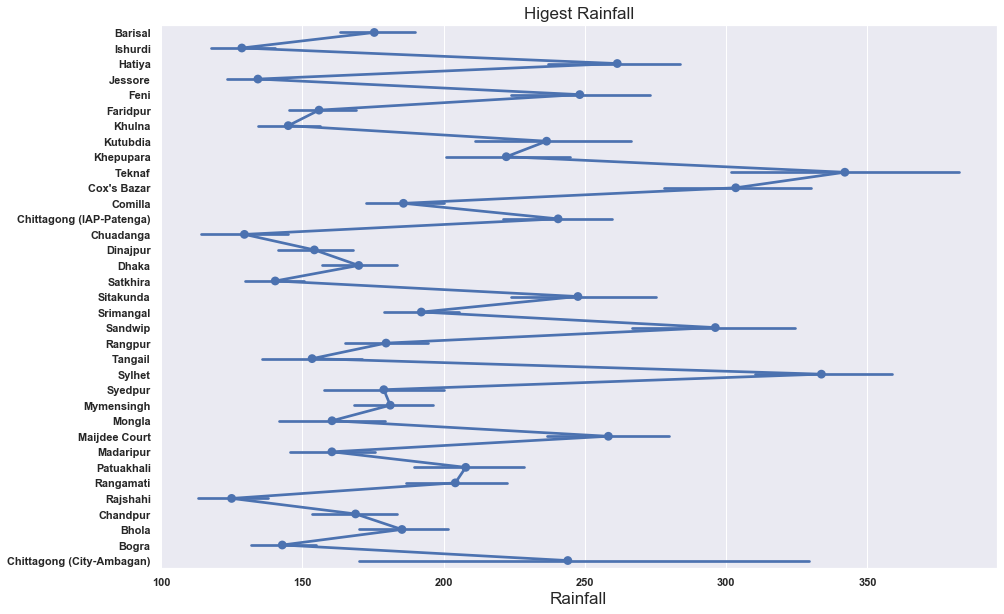

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = True))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:])
y = list(info['Rainfall'][:])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

### Monthly Rainfall

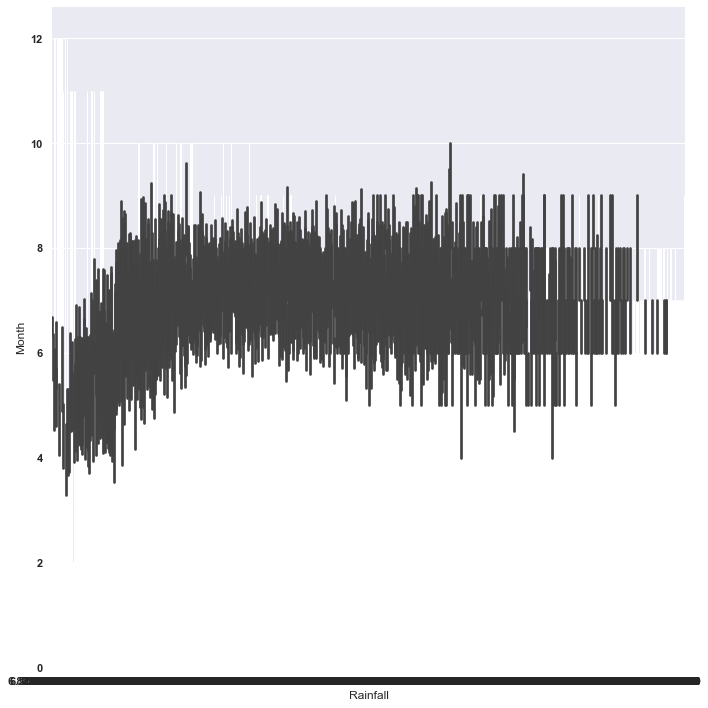

In [0]:
g = sns.catplot(x = "Rainfall" , y = "Month" , data = df , kind = 'bar' , height = 10 , color = 'green')
g.despine(left=True)

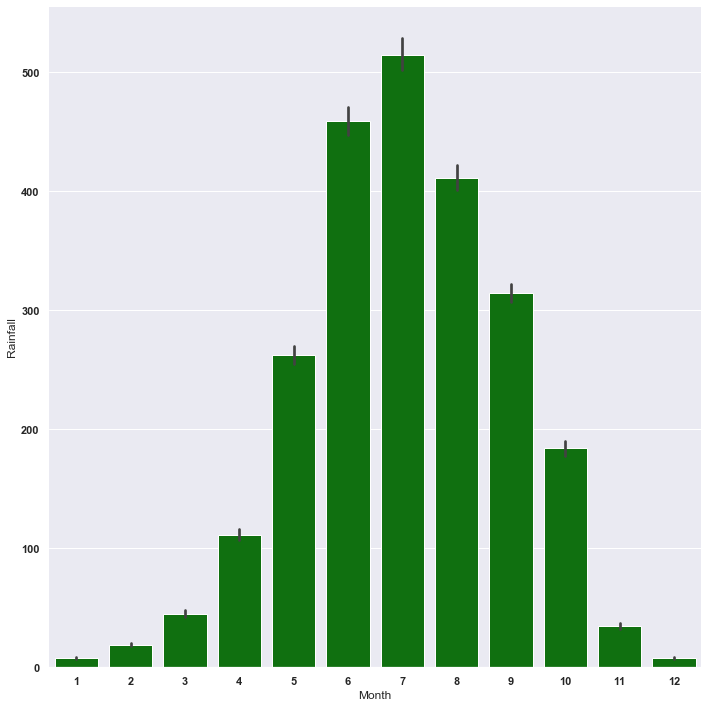

In [0]:
g = sns.catplot(x = "Month" , y = "Rainfall" , data = df , kind = 'bar' , height = 10 , color = 'green')
g.despine(left=True)

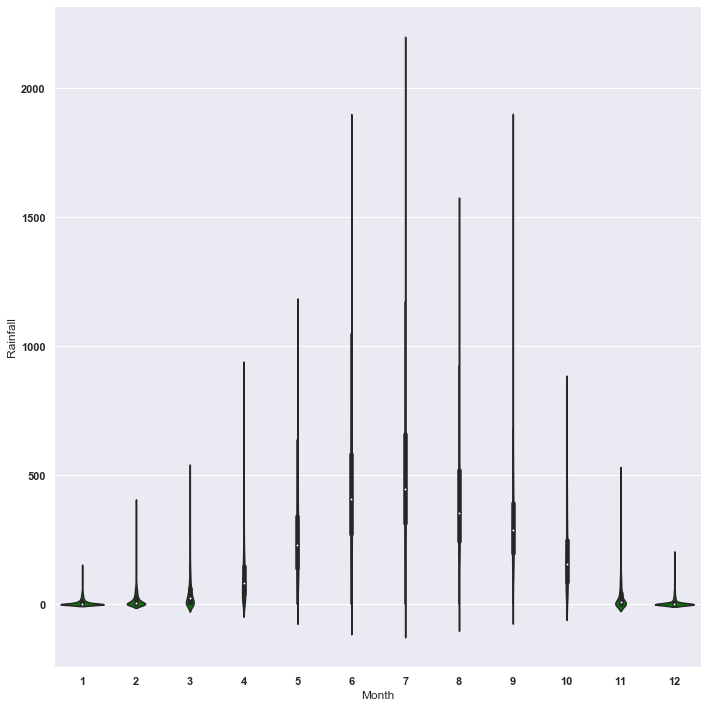

In [0]:
g = sns.catplot(x = "Month" , y = "Rainfall" , data = df , kind = 'violin' , height = 10 , color = 'green')
g.despine(left=True)

In Bnagladesh JUNE,JULY and August month have the higest amount of rainfall occured.Both the graph show the same result.

### Realtion between temperature and Rainfall

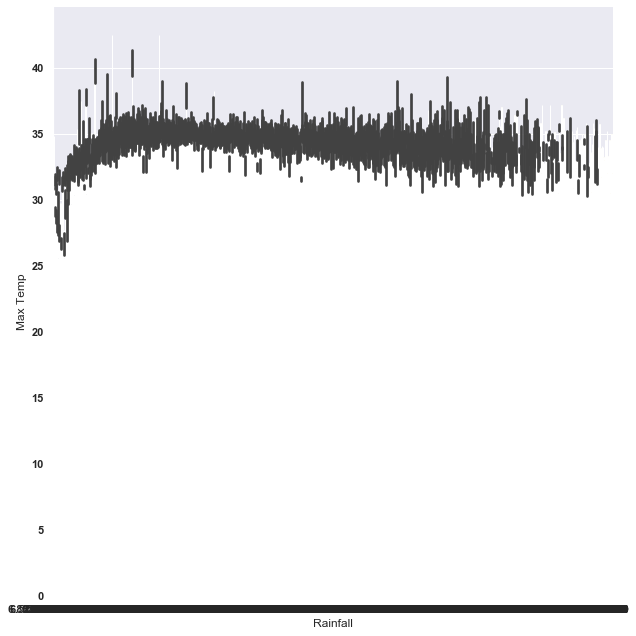

In [0]:
sns.catplot(x = 'Rainfall' , y = 'Max Temp' , data = df , height = 9 , kind = 'bar' , palette = "cividis")

### Find out the relation with temparature rainfall in an area

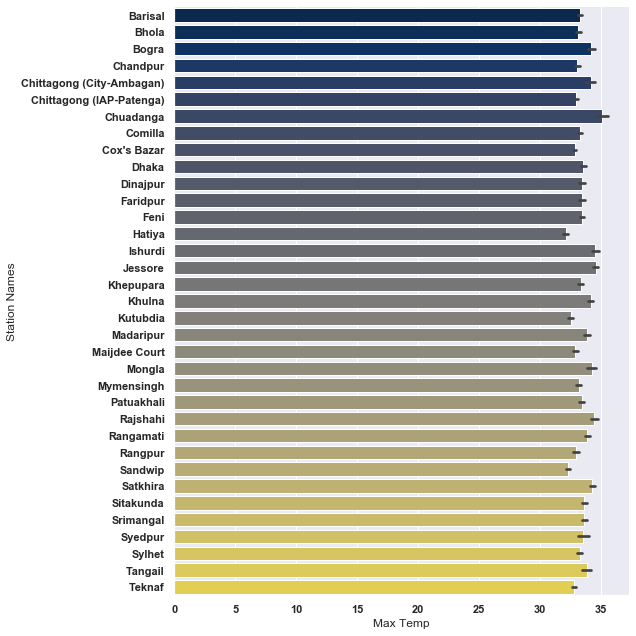

In [0]:
sns.catplot(x = 'Max Temp' , y = 'Station Names' , data = df , height = 9 , kind = 'bar' , palette = "cividis")

Almost all the area have high temperature.

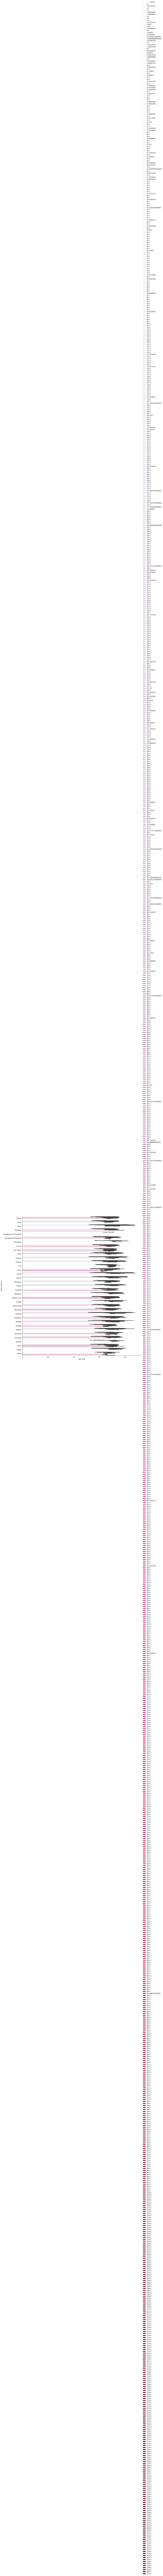

In [11]:
sns.catplot(x = 'Max Temp' , y = 'Station Names' , hue = 'Rainfall' , data = df , height = 15 , kind = 'bar' , palette = "PuRd")

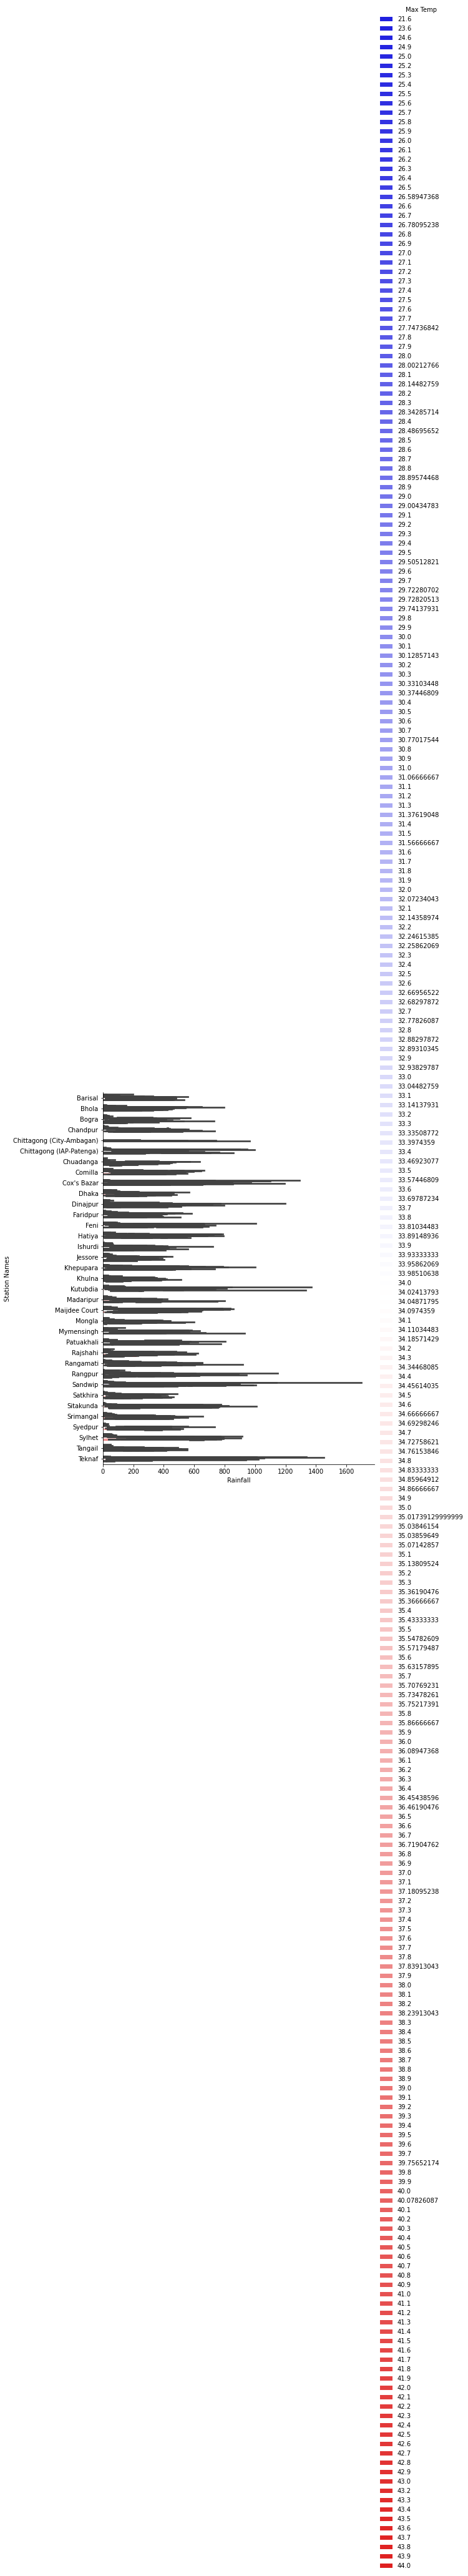

In [10]:
sns.catplot(x = 'Rainfall' , y = 'Station Names' , hue = 'Max Temp' , data = df , height = 9 , kind = 'bar' , palette = "bwr")

### Which area have highest rainfall over the last 65 years